<a href="https://colab.research.google.com/github/suswong/Coursera/blob/main/Course_7_Salifort_Motors_project_lab_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


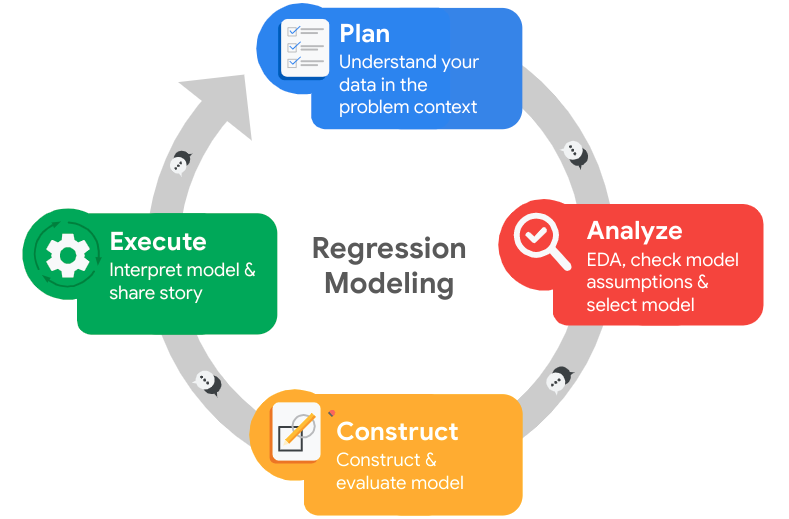

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below.

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

- Who are your stakeholders for this project?

HR department


- What are you trying to solve or accomplish?
Build a predictive model that helps identify employee at risk of leaving
use the factors to (satifaction level, evaluation, workload, tenure... to help identify those employess


- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]
stakeholders: HR department and the leaders of Sailfort Motors. Other potential stakeholders are other employeees of the company as insights can lead to changes to company policites, ultimately, affecting them.

The goal of the project is to understand the factors that most likely cause an employee to leave the company and create a predictive model that can identify employees at risk of leaving and help improve employee retention.



## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("https://raw.githubusercontent.com/suswong/Coursera/refs/heads/main/HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###


In [5]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={
    "satisfaction_level": "satisfaction",
    "last_evaluation": "evaluation",
    "number_project": "projects",
    "average_montly_hours": "monthly_hours",
    "time_spend_company":"tenure",
    "Work_accident": "work_accident",
    "Department": "department"


},inplace = True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction', 'evaluation', 'projects', 'monthly_hours', 'tenure',
       'work_accident', 'left', 'promotion_last_5years', 'department',
       'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

- There is no missing data

In [8]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().sum()

,0
satisfaction,0
evaluation,0
projects,0
monthly_hours,0
tenure,0
work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


### Check duplicates

Check for any duplicate entries in the data.
- 3000 observation are duplicates. It is unlikely that two employees self-reported the exact same response for every column. So we drop them.

In [9]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

np.int64(3008)

In [10]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
duplicates = df0[df0.duplicated()]
duplicates

,satisfaction,evaluation,projects,monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###

df = df0.drop_duplicates()
# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df

,satisfaction,evaluation,projects,monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [12]:
df.duplicated().sum()

np.int64(0)

### Check outliers

Check for outliers in the data.
- The boxplot above shows that there are outliers in the `tenure` variable.

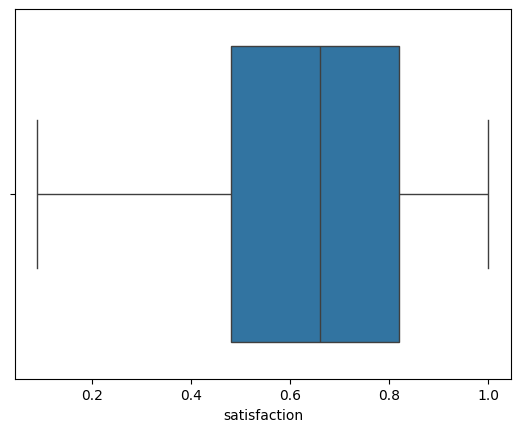

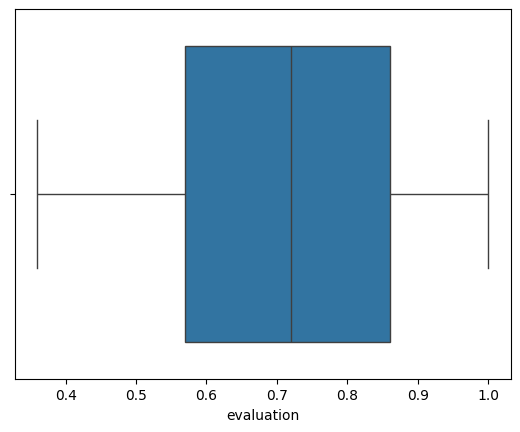

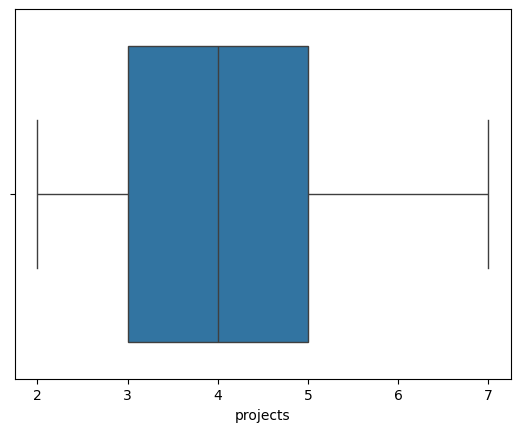

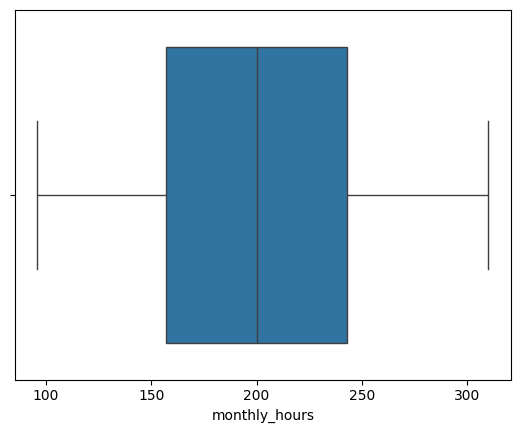

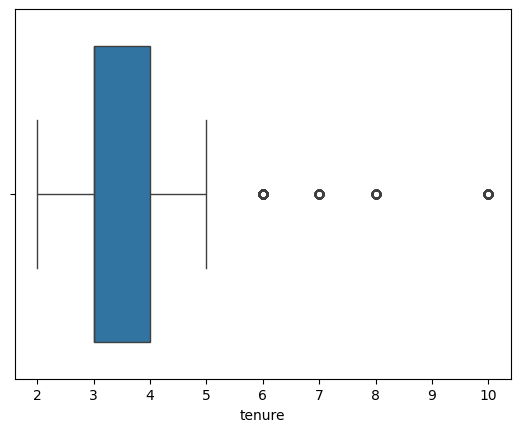

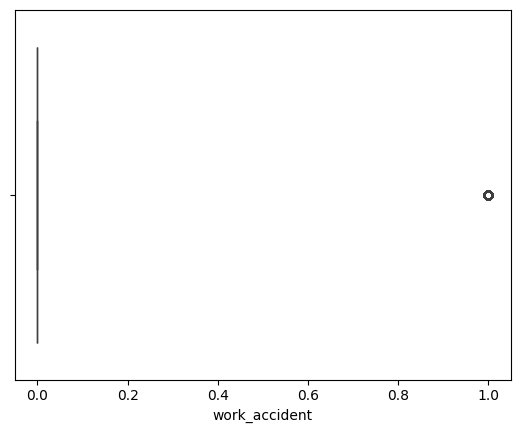

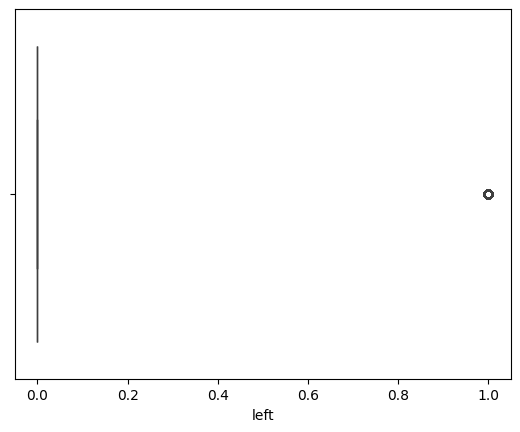

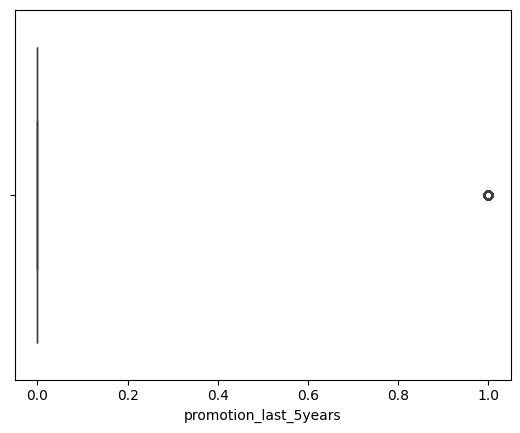

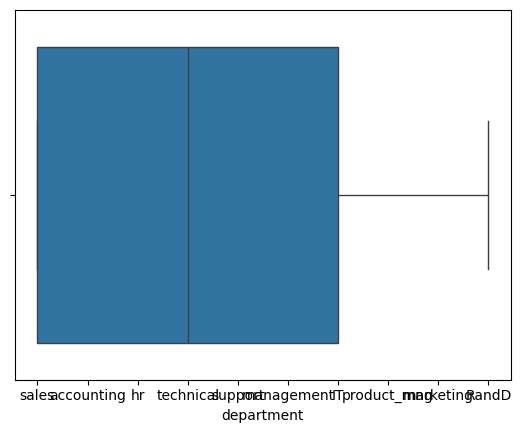

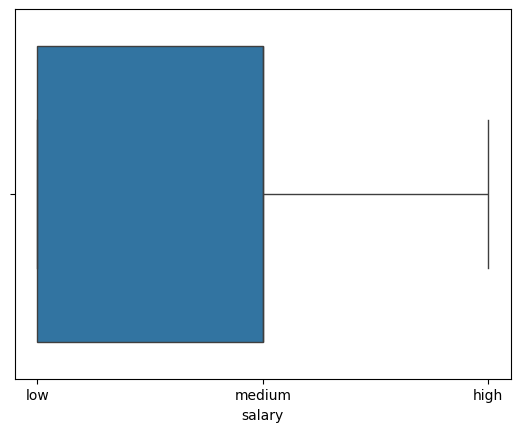

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
for col in df.columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.show()


In [14]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

# Compute the 25th percentile value in `tenure`
percentile25 = df['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df[(df['tenure'] > upper_limit) | (df['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))


Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

- There is class imbalance

In [15]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
left_counts = df['left'].value_counts()
left_counts

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
left_perc = df['left'].value_counts(normalize=True)*100
left_perc

,proportion
left,
0,83.39588
1,16.60412


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Histogram of the Variables
- satisfaction: Bimodel (suggests that there are two groups: employees satisfied and disatisfied. There is a significant portion of employee is disatisfied)
- evaluation: trimodel
- projects: high number of employee working on 3, 4, 5, projects
- monthly hours:  bimodal with peaks at 150 and 250 hours. This suggest employee are working with standard hours and some are overworked.
- tenure: common is 3-4 years. There is a steep drop off after 5 years, which may indicate high turnover rate among long term employee
- work accident: majority of employee have not had work accident
- promotion: moajority of employees have not been promoted in the last 5 years
- left: class imbalance with majority of employees have stayed

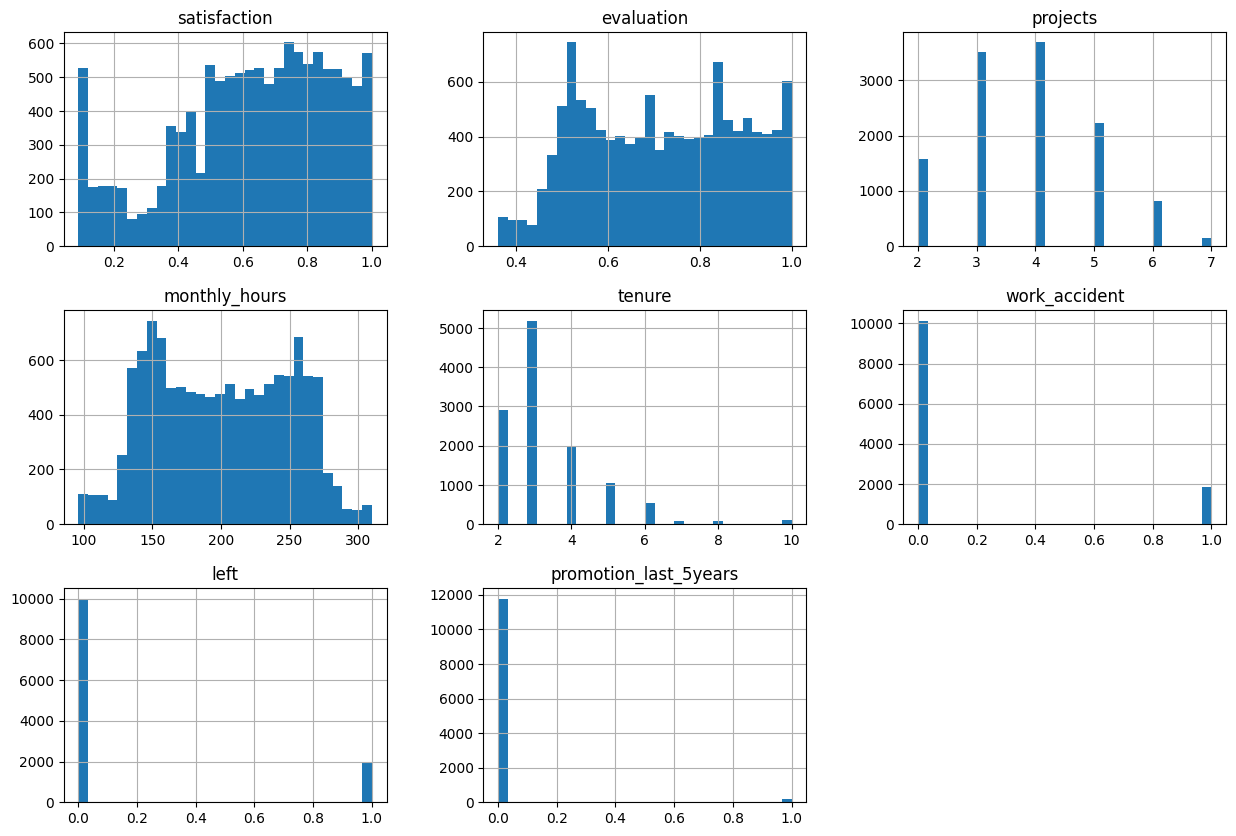

In [16]:
df.hist(bins=30, figsize=(15,10))
plt.show()

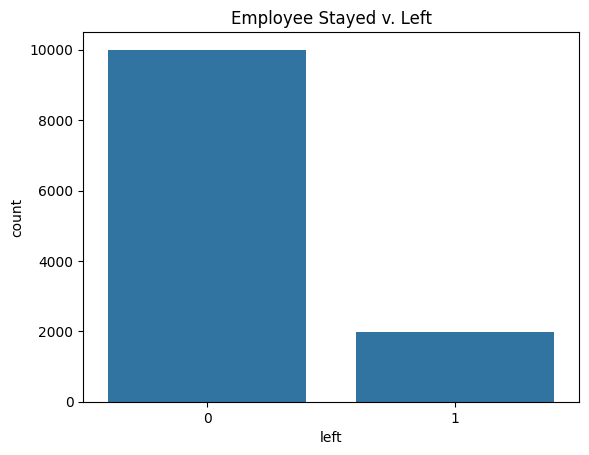

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure()
sns.countplot(x='left', data = df)
plt.title("Employee Stayed v. Left")
plt.show()

- Employees who stayed have a higher median stastifaction level and employees who left have a lower median stastifaction level This plot reveals that low satisfaction is a strong indicator of employee leaving the company

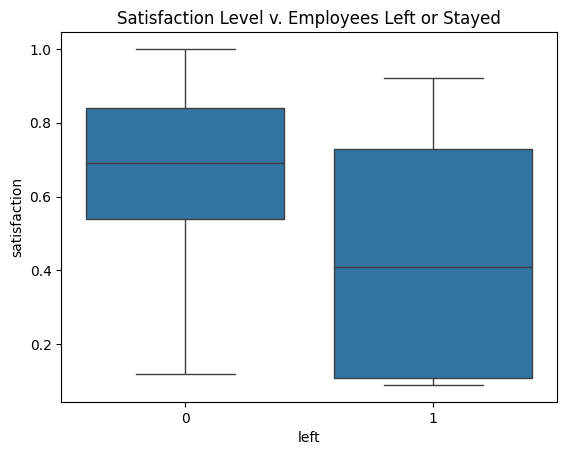

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure()
sns.boxplot(x='left', y = "satisfaction", data = df)
plt.title("Satisfaction Level v. Employees Left or Stayed")
plt.show()

## Low satisfaction is often associated with employees leaving, which is true here

- higher median workload for employees who have left
This indicates higher workload is associated with a greater likeliehood of employee leaving the company

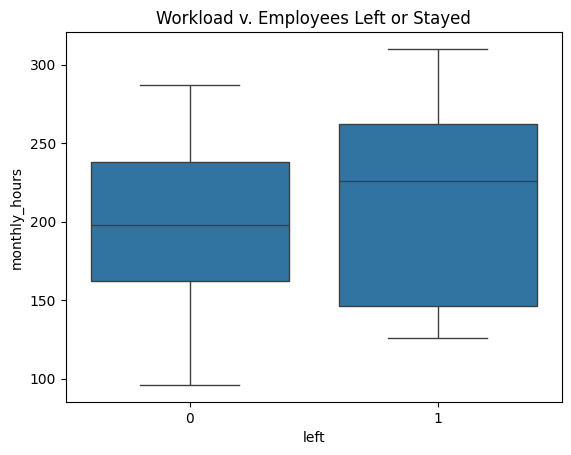

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure()
sns.boxplot(x='left', y = "monthly_hours", data = df)
plt.title("Workload v. Employees Left or Stayed")
plt.show()

# Those who left has higher workload

employee working on 6 or 7 projects are more likely to leave the company. low number of project is also a risk factor as employees who left with only 2 projects is greater than the number of employees who stayed.
Both being overworked or being underutilized are factors of employee's decision to leave

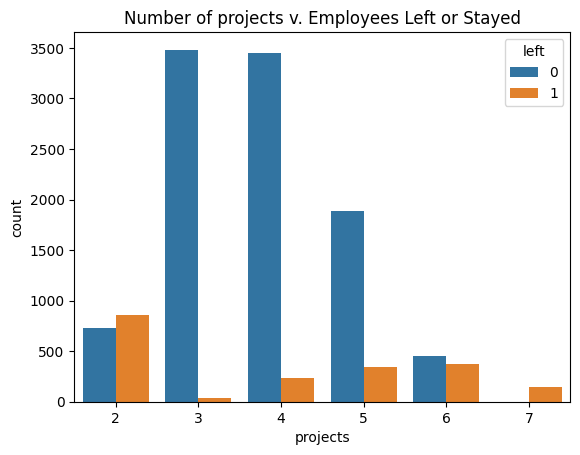

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure()
sns.countplot(x='projects', hue = 'left', data = df)
plt.title("Number of projects v. Employees Left or Stayed")
plt.show()


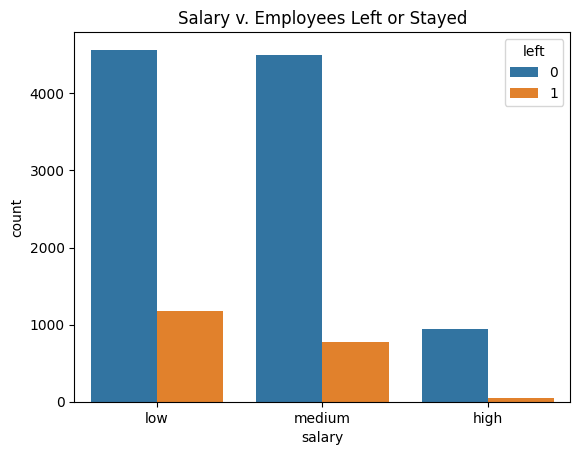

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure()
sns.countplot(x='salary', hue = 'left', data = df)
plt.title("Salary v. Employees Left or Stayed")
plt.show()


- HR and Accountong have the highest turnover rates.
- R&D and Management have the lowest

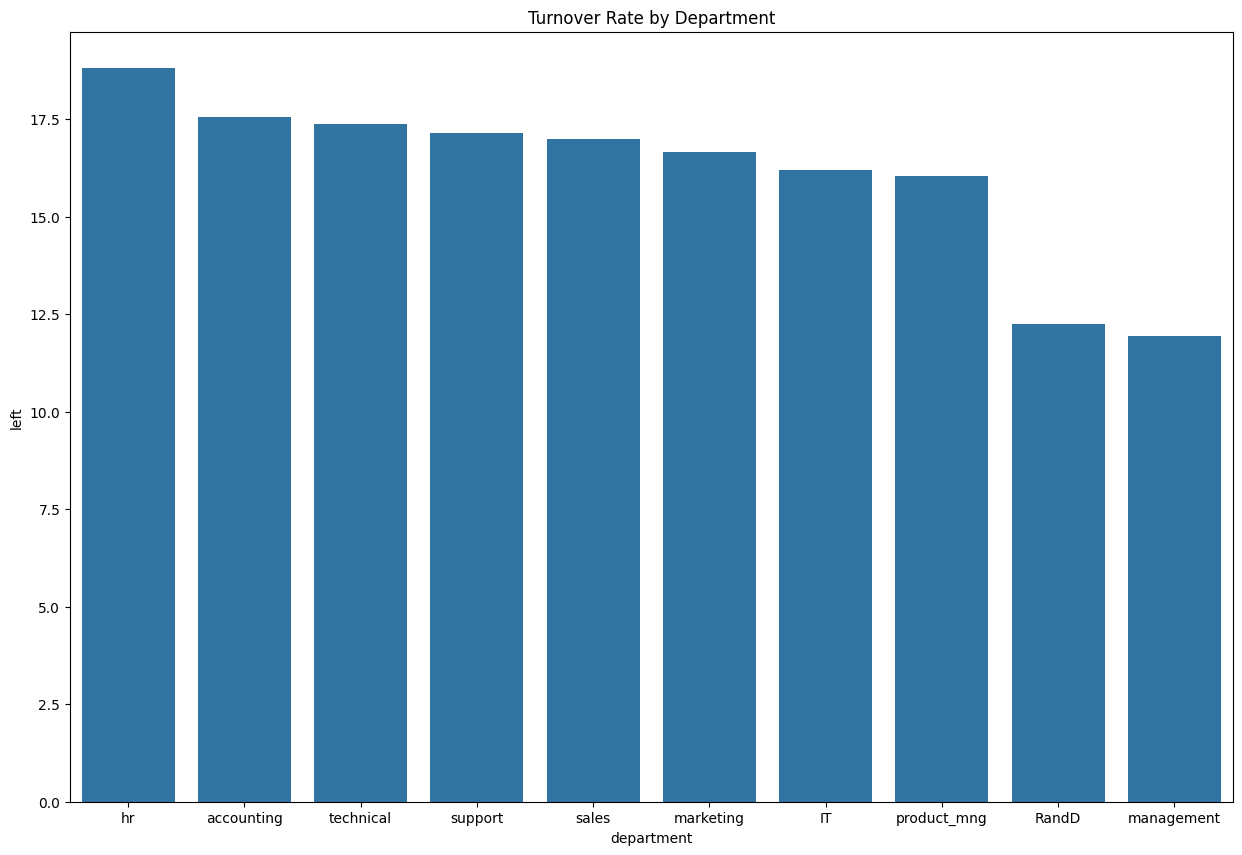

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
#plt.figure(figsize = (10,5))
#sns.countplot(x='department', hue = 'left', data = df)
#plt.title("department v. Employees Left or Stayed")
#plt.show()

turnover_rate = df.groupby('department')['left'].mean().reset_index()
turnover_rate['left'] = turnover_rate['left']*100

turnover_rate_sorted = turnover_rate.sort_values(by='left', ascending = False)
plt.figure(figsize=(15,10))
sns.barplot(x = 'department', y = 'left', data = turnover_rate_sorted )
plt.title("Turnover Rate by Department")
plt.show()


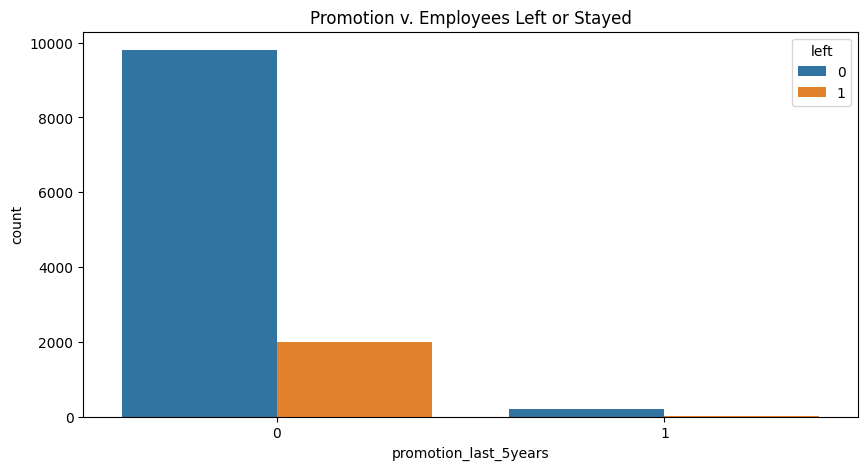

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize = (10,5))
sns.countplot(x='promotion_last_5years', hue = 'left', data = df)
plt.title("Promotion v. Employees Left or Stayed")
plt.show()

- most vulnerable group of employee turnover is those with 3- years of experience

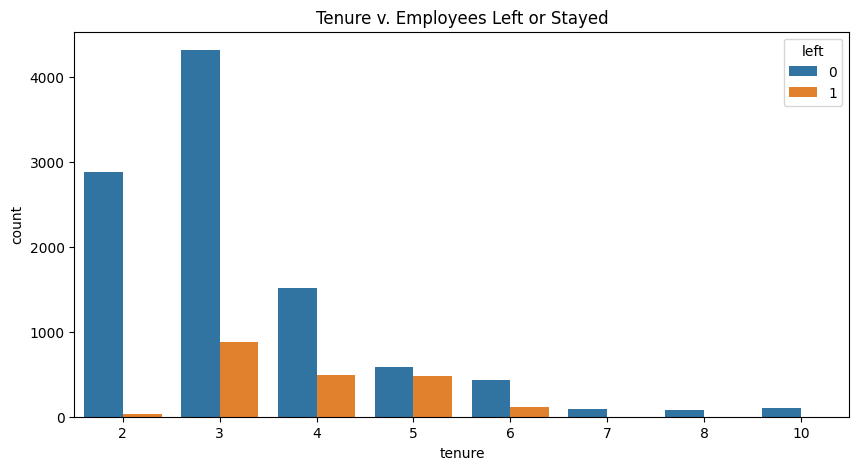

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize = (10,5))
sns.countplot(x='tenure', hue = 'left', data = df)
plt.title("Tenure v. Employees Left or Stayed")
plt.show()

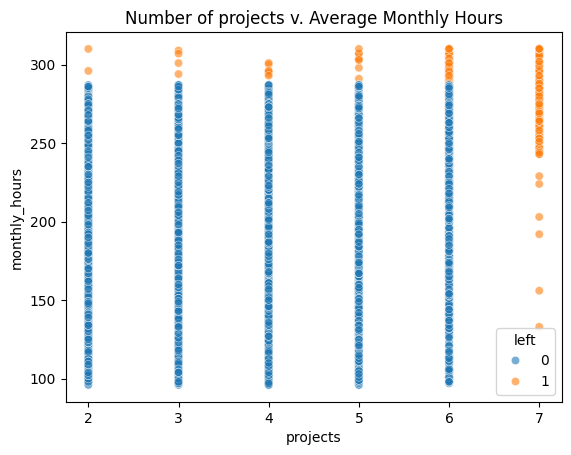

In [25]:
plt.figure()
sns.scatterplot(data=df, x = "projects", y = "monthly_hours", hue= "left", alpha = 0.6)
plt.title("Number of projects v. Average Monthly Hours")
plt.show()

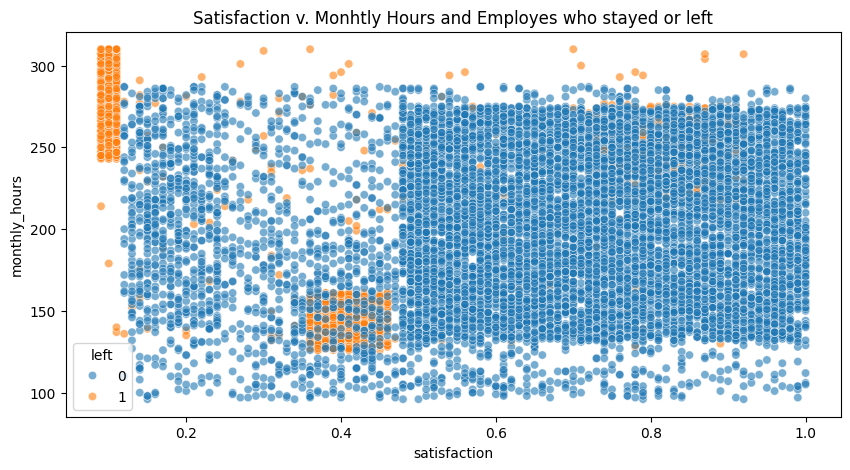

In [26]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, y = "monthly_hours", x = "satisfaction", hue= "left", alpha = 0.6)
plt.title("Satisfaction v. Monhtly Hours and Employes who stayed or left")
plt.show()

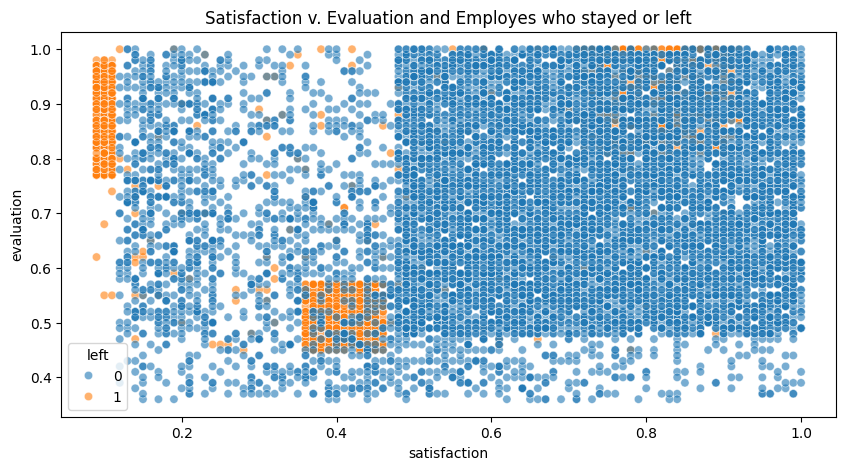

In [27]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, y = "evaluation", x = "satisfaction", hue= "left", alpha = 0.6)
plt.title("Satisfaction v. Evaluation and Employes who stayed or left")
plt.show()

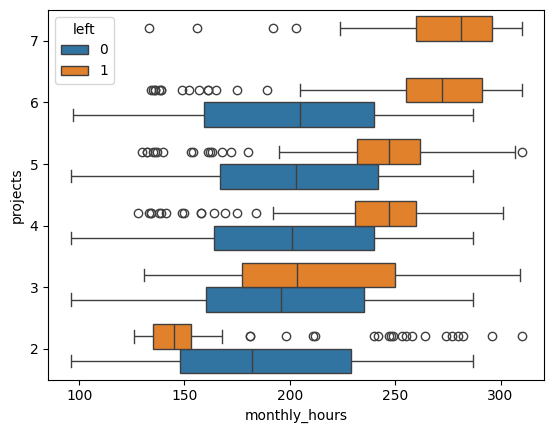

In [30]:
sns.boxplot(data=df, x='monthly_hours', y='projects', hue='left', orient="h")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

There are no multicollinearity present in this dataset.

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [33]:
### YOUR CODE HERE ###
df_encoded = pd.get_dummies(df, columns = ['department', 'salary'], drop_first= True)
df_encoded

,satisfaction,evaluation,projects,monthly_hours,tenure,work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,False,False,False,True,False,False,False,False,False,False,False
11996,0.74,0.95,5,266,10,0,0,1,False,False,False,True,False,False,False,False,False,False,False
11997,0.85,0.54,3,185,10,0,0,1,False,False,False,True,False,False,False,False,False,False,False
11998,0.33,0.65,3,172,10,0,0,1,False,False,False,False,True,False,False,False,False,False,False


In [34]:
df_logreg = df_encoded[(df_encoded['tenure'] >= lower_limit) & (df_encoded['tenure'] <= upper_limit)]

X = df_logreg.drop('left', axis = 1)
y = df_logreg['left']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, stratify = y, random_state = 42)

In [36]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model = LogisticRegression(max_iter = 1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [37]:
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:,1]

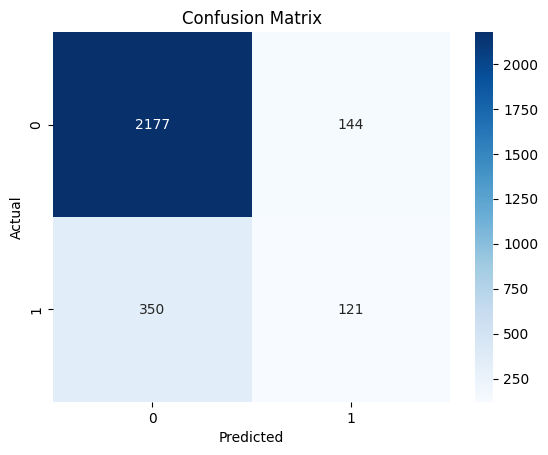

In [38]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [39]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      2321
    Predicted would leave       0.46      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.66      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



Random Forest Classifier

In [40]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight = 'balanced')

In [41]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [42]:
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:,1]

In [47]:
auc_rf = roc_auc_score(y_test, y_pred_rf)
auc_rf

np.float64(0.9587985996957531)

In [49]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred_rf, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      1.00      0.99      2321
    Predicted would leave       0.99      0.92      0.95       471

                 accuracy                           0.98      2792
                macro avg       0.99      0.96      0.97      2792
             weighted avg       0.99      0.98      0.98      2792



In [50]:
feature_importance = pd.DataFrame(rf_model.feature_importances_, index = X.columns, columns = ['Importance'])
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = False)
feature_importance

,Importance
satisfaction,0.302178
tenure,0.234762
projects,0.168509
monthly_hours,0.135073
evaluation,0.114281
work_accident,0.010352
salary_low,0.006496
department_sales,0.004497
department_technical,0.004475
salary_medium,0.003747


- feature importance: satisfaction, tenure, projects, evaluation, monthly hours

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results


### Conclusion, Recommendations, Next Steps

The project analyzes employee turnover for a fictional company, Salifort Motors. The goal was to help the HR department understand what factors lead employees to leave and to build a model that predicts who might be at risk of leaving.

Using a combination of EDA and machine learning models, the following insights were uncovered.
-Low job satisfaction was the strongest predictor of attrition.
-Employees who were overworked or underutilized (in terms of projects and hours) were more likely to leave.
-Lack of promotion and low salary levels were also significant contributors.
-Departments like HR and Accounting showed higher turnover, pointing to possible cultural or workload issues.

Amongst the models trained Random Forest outperformed across all evaluation metrics — accuracy, precision, recall, and F1-score. It also provided helpful feature importance rankings, with satisfaction, tenure, and project count among the top predictors.

Based on the analysis, it is highly recommended to do some of the following:
-Regularly monitor employee satisfaction
- Improve workload distribution
- Enhance promotion and development opportunities,
- explore root causes in high-turnover departments.